**En utilisant la bibliothèque spacy qui est une bibliothèque très utilisée pour les traitements NLP. Charger les bibliothèques necessaires pour le pré-processing**SpacyNlpPipeline.svg
```



In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')# Charger le pipeline entrainé pour l'Anglais
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [2]:
nlp.add_pipe("token_splitter")#effectue la segmentation du texte en entrée en mots
nlp.add_pipe("sentencizer")#effectue la segmentation du texte en entrée en phrases
print(nlp.pipe_names)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'token_splitter', 'sentencizer']


**Intrduire un exemple du texte et effectuer le pré-processing**



In [3]:
txt=nlp("""The Massachusetts Institute of Technology (MIT) is a private land-grant research university in Cambridge, Massachusetts. Established in 1861, MIT has since played a key role in the development of modern technology and science, ranking among the top academic institutions in the world.[10][11][12][13]. Founded in response to the increasing industrialization of the United States, MIT adopted a European polytechnic university model and stressed laboratory instruction in applied science and engineering. MIT is one of three private land grant universities in the United States, the others being Cornell University and Tuskegee University. The institute has an urban campus that extends more than a mile (1.6 km) alongside the Charles River, and encompasses a number of major off-campus facilities such as the MIT Lincoln Laboratory, the Bates Center, and the Haystack Observatory, as well as affiliated laboratories such as the Broad and Whitehead Institutes.
As of December 2021, 98 Nobel laureates,[14] 26 Turing Award winners, and 8 Fields Medalists have been affiliated with MIT as alumni, faculty members, or researchers.[15] In addition, 58 National Medal of Science recipients, 29 National Medals of Technology and Innovation recipients, 50 MacArthur Fellows,[16] 83 Marshall Scholars,[17] 41 astronauts,[18] 16 Chief Scientists of the US Air Force, and numerous heads of states have been affiliated with MIT. The institute also has a strong entrepreneurial culture and MIT alumni have founded or co-founded many notable companies.[19][20] MIT is a member of the Association of American Universities (AAU)[21] and has received more Sloan Research Fellowships and Hertz Fellowships than any other university.[22][23]""")
#https://spacy.io/api/sentencizer
print (list(txt.sents)[0])
print (list(txt.sents)[1])
print (list(txt.sents)[2])

#https://spacy.io/api/tokenizer
print(txt[1],txt[2],txt[3])

The Massachusetts Institute of Technology (MIT) is a private land-grant research university in Cambridge, Massachusetts.
Established in 1861, MIT has since played a key role in the development of modern technology and science, ranking among the top academic institutions in the world.[10][11][12][13].
Founded in response to the increasing industrialization of the United States, MIT adopted a European polytechnic university model and stressed laboratory instruction in applied science and engineering.
Massachusetts Institute of


Afficher le vocabulaire de ce texte
Lien vers la documentation spacy https://spacy.io/usage/spacy-101#pipelines

In [4]:
for word in txt[0:3]:
    lexeme = txt.vocab[word.text]
    print(lexeme.text, lexeme.orth_, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

The The Xxx T The True False True en
Massachusetts Massachusetts Xxxxx M tts True False True en
Institute Institute Xxxxx I ute True False True en


**Afficher les POS des phrases du texte**
https://spacy.io/usage/linguistic-features/

In [5]:
for word in txt[0:20]:
  print(f'{word.text:{15}} {word.lemma_:{15}} {word.pos_:{8}} {word.tag_:{8}} {spacy.explain(word.pos_):{20}} {word.dep_:{8}}  ' )

The             the             DET      DT       determiner           det       
Massachusetts   Massachusetts   PROPN    NNP      proper noun          compound  
Institute       Institute       PROPN    NNP      proper noun          nsubj     
of              of              ADP      IN       adposition           prep      
Technology      Technology      PROPN    NNP      proper noun          pobj      
(               (               PUNCT    -LRB-    punctuation          punct     
MIT             MIT             PROPN    NNP      proper noun          appos     
)               )               PUNCT    -RRB-    punctuation          punct     
is              be              AUX      VBZ      auxiliary            ROOT      
a               a               DET      DT       determiner           det       
private         private         ADJ      JJ       adjective            amod      
land            land            NOUN     NN       noun                 compound  
-               

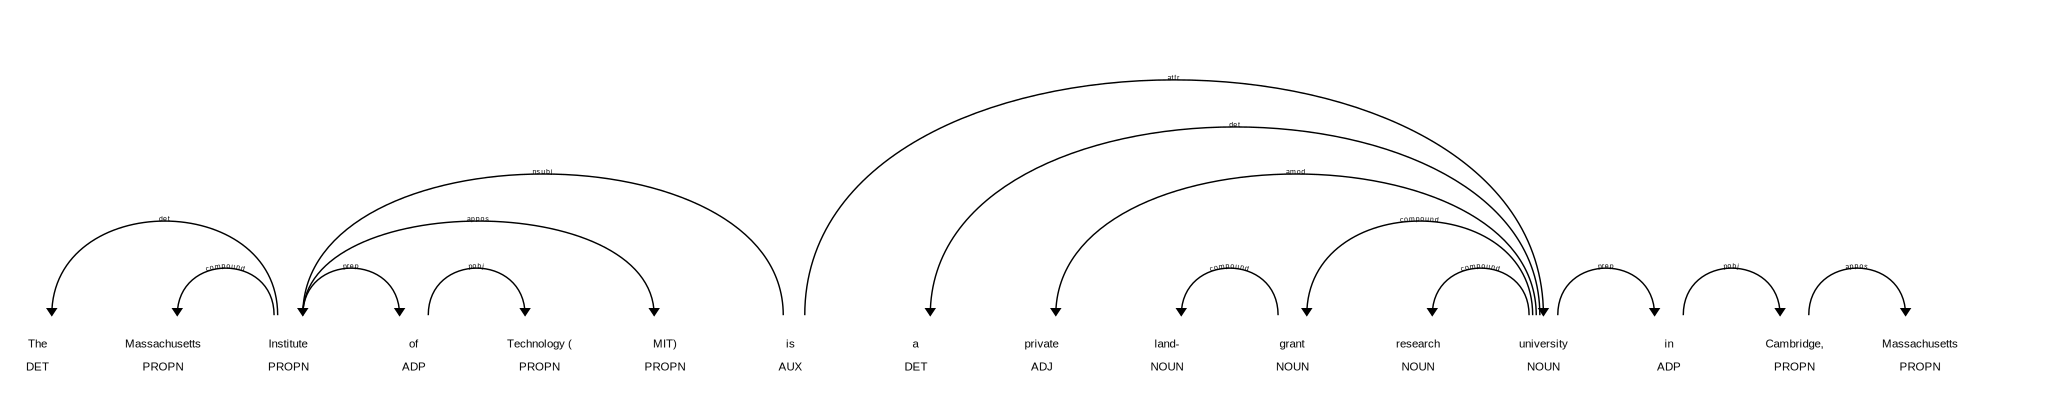

In [6]:
from spacy import displacy
span = txt[0:20]
deptree=displacy.render(span, style="dep")
from IPython.core.display import SVG
SVG(deptree)

Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over

In [7]:
for chunk in span.noun_chunks:
    print(f'{chunk.text:{50}} {chunk.root.text:{15}} {chunk.root.dep_:{8}}{chunk.root.head.text:{15}}')

The Massachusetts Institute                        Institute       nsubj   is             
Technology                                         Technology      pobj    of             
MIT                                                MIT             appos   Institute      
a private land-grant research university           university      attr    is             
Cambridge                                          Cambridge       pobj    in             
Massachusetts                                      Massachusetts   appos   Cambridge      


Tester le modèle ML par défaut de spacy pour effectuer une NER

In [8]:
for ent in span.ents:
    print(f'{ent.text:{50}} {ent.label_:{15}} {spacy.explain(ent.label_)}')
SVG(displacy.render(span, style="ent"))

The Massachusetts Institute of Technology          ORG             Companies, agencies, institutions, etc.
MIT                                                ORG             Companies, agencies, institutions, etc.
Cambridge                                          GPE             Countries, cities, states
Massachusetts                                      GPE             Countries, cities, states


**Exercice 01:**

Confectionner votre propre Rule Based RE en s'inpirant des patterns de Hearst
Hearst, M. A. (1992). **Automatic acquisition of hyponyms from large text corpora**. In COLING 1992 Volume 2: The 14th International Conference on Computational Linguistics.

Questions:


1-Quel est l'objectif de votre extraction i-e les types de relations ciblées?

2-Citer deux ou trois exemples de relations

3-Donner les patterns en suivant la notation de Hearst

4-Implémenter ces patterns en utilisant SpaCy


**Exemples de patterns:**

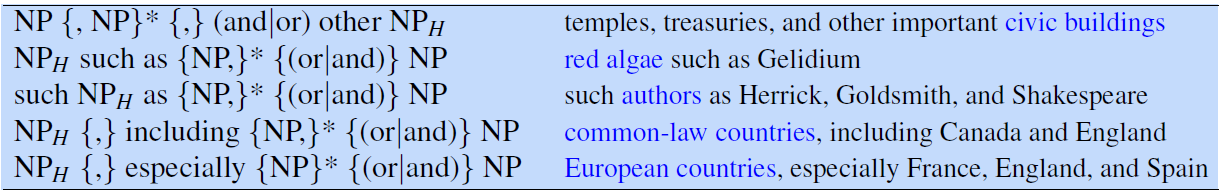


# Reponse
1)L'objectif de l'extraction d'information est d'identifier les  types du cancer et c'est differents symptomes,causes,infections .

2) Nous avons un exemple de texte sur le cancer, nous voulons représenter la relation "is a" qui est \[comme\] qui peut apparaître avec les infections, les types de cancer ou les symptômes. cette relation peut etre exprimer comme "such as" et "include" et "including".

La deuxième relation est "because", qui peut être exprimée par "due to" ou "may indicate"

3)
* such as: {DET}* {NOUN|PROPN}* such as {DET}* {,NOUN|,PROPN}* {and|or} {NOUN|PROPN}  
exemples :infections, exposure to ionizing radiation, and environmental pollutants
* include}including : {NOUN|PROPN}* {including|include} {,NOUN|,PROPN}* {and|or} {NOUN|PROPN}    
exemples : symptoms include a lump, abnormal bleeding, prolonged cough, unexplained weight loss, and a change in bowel movements
* indicate : {NOUN|PROPN}* may indicate {DET}* {NOUN|PROPN}*    
exemples : symptoms may indicate cancer
* due to : {NOUN|PROPN}* are due to {DET}* {NOUN|PROPN}*      
exemple :  cancers are due to inherited genetic defects

4)


In [9]:
import spacy
from spacy.matcher import Matcher


def extract_disease_relations(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    # Define Hearst-like patterns
    """
    such_as_patterns = [
        {"POS": "DET", "OP": "?"},      # optional determiner
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns
        {"LOWER": "such"},
        {"LOWER": "as"},
        {"POS": "DET", "OP": "?"},      # optional determiner
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"}  # one or more nouns or proper nouns
    ]"""
    such_as_pattern = [
        {"POS": "DET", "OP": "?"},      # optional determiner
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns
        {"LOWER": "such"},
        {"LOWER": "as"},
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns (name)
        {"IS_PUNCT": True, "OP": "+"},  # optional punctuation (comma)
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns (name)

        {"LOWER": {"in": ["or", "and"]}, "OP": "?"},  # optional "or" or "and"
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"}  # one or more nouns or proper nouns (name)
    ]
    including_pattern = [
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},
        {"LOWER": {"in": ["including", "include"]}},
        {"POS": "DET", "OP": "?"},
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},

    ]
    indicate_pattern = [
      {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns
      {"LOWER": "may"},
      {"LOWER": "indicate"},
      {"POS": "DET", "OP": "?"},  # optional determiner
      {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns
      ]
    due_to_pattern = [
      {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns
      {"LOWER": "are"},
      {"LOWER": "due"},
      {"LOWER": "to"},
      {"POS": "DET", "OP": "?"},  # optional determiner
      {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},  # one or more nouns or proper nouns
    ]

    matcher = Matcher(nlp.vocab)
    matcher2 = Matcher(nlp.vocab)
    matcher.add("DISEASE_Is_A_RELATION", [such_as_pattern,including_pattern])
    matcher2.add("DISEASE_Because_RELATION", [indicate_pattern,due_to_pattern])
    matches = matcher(doc)
    matches2 = matcher2(doc)

    disease_like_relations = []
    disease_because_relations = []
    for match_id, start, end in matches:
        relation_span = doc[start:end]
        relation = relation_span.text
        disease_like_relations.append(relation)
    for match_id, start, end in matches2:
        relation_span = doc[start:end]
        relation = relation_span.text
        disease_because_relations.append(relation)

    return [disease_like_relations,disease_because_relations]

# Example usage
text = """
Cancer is a group of diseases involving abnormal cell growth with the potential to invade or spread to other parts of the body. These contrast with benign tumors, which do not spread. Possible signs and symptoms include a lump, abnormal bleeding, prolonged cough, unexplained weight loss, and a change in bowel movements. While these symptoms may indicate cancer, they can also have other causes. Over 100 types of cancers affect humans.

Tobacco use is the cause of about 22% of cancer deaths. Another 10% are due to obesity, poor diet, lack of physical activity or excessive alcohol consumption. Other factors include certain infections, exposure to ionizing radiation, and environmental pollutants. In the developing world, 15% of cancers are due to infections such as Helicobacter pylori, hepatitis B, hepatitis C, human papillomavirus infection, Epstein–Barr virus and human immunodeficiency virus (HIV). These factors act, at least partly, by changing the genes of a cell. Typically, many genetic changes are required before cancer develops. Approximately 5–10% of cancers are due to inherited genetic defects. Cancer can be detected by certain signs and symptoms or screening tests. It is then typically further investigated by medical imaging and confirmed by biopsy.

The risk of developing certain cancers can be reduced by not smoking, maintaining a healthy weight, limiting alcohol intake, eating plenty of vegetables, fruits, and whole grains, vaccination against certain infectious diseases, limiting consumption of processed meat and red meat, and limiting exposure to direct sunlight. Early detection through screening is useful for cervical and colorectal cancer. The benefits of screening for breast cancer are controversial. Cancer is often treated with some combination of radiation therapy, surgery, chemotherapy and targeted therapy. Pain and symptom management are an important part of care. Palliative care is particularly important in people with advanced disease. The chance of survival depends on the type of cancer and extent of disease at the start of treatment. In children under 15 at diagnosis, the five-year survival rate in the developed world is on average 80%. For cancer in the United States, the average five-year survival rate is 66% for all ages.
Chemotherapy is the treatment of cancer with one or more cytotoxic anti-neoplastic drugs (chemotherapeutic agents) as part of a standardized regimen. The term encompasses a variety of drugs, which are divided into broad categories such as alkylating agents and antimetabolites. Traditional chemotherapeutic agents act by killing cells that divide rapidly, a critical property of most cancer cells.

It was found that providing combined cytotoxic drugs is better than a single drug, a process called the combination therapy, which has an advantage in the statistics of survival and response to the tumor and in the progress of the disease. A Cochrane review concluded that combined therapy was more effective to treat metastasized breast cancer. However, generally it is not certain whether combination chemotherapy leads to better health outcomes, when both survival and toxicity are considered.

Targeted therapy is a form of chemotherapy that targets specific molecular differences between cancer and normal cells. The first targeted therapies blocked the estrogen receptor molecule, inhibiting the growth of breast cancer. Another common example is the class of Bcr-Abl inhibitors, which are used to treat chronic myelogenous leukemia (CML). Currently, targeted therapies exist for many of the most common cancer types, including bladder cancer, breast cancer, colorectal cancer, kidney cancer, leukemia, liver cancer, lung cancer, lymphoma, pancreatic cancer, prostate cancer, skin cancer, and thyroid cancer as well as other cancer types.

The efficacy of chemotherapy depends on the type of cancer and the stage. In combination with surgery, chemotherapy has proven useful in cancer types including breast cancer, colorectal cancer, pancreatic cancer, osteogenic sarcoma, testicular cancer, ovarian cancer and certain lung cancers. Chemotherapy is curative for some cancers, such as some leukemias, ineffective in some brain tumors, and needless in others, such as most non-melanoma skin cancers. The effectiveness of chemotherapy is often limited by its toxicity to other tissues in the body. Even when chemotherapy does not provide a permanent cure, it may be useful to reduce symptoms such as pain or to reduce the size of an inoperable tumor in the hope that surgery will become possible in the future.
"""
#source wikipedia

result = extract_disease_relations(text)
print("like relations")
print([item for item in result[0] if not item.lower().startswith("types")])

print("because relations")
print(result[1])


like relations
['symptoms include a lump', 'infections such as Helicobacter pylori, hepatitis B', 'cancer types including breast', 'cancer types including breast cancer']
because relations
['symptoms may indicate cancer', '% are due to obesity', 'cancers are due to infections']


**Exercice 02**

En se basant sur le travail de Lan, W., Chen, Y., Xu, W., & Ritter, A. (2020, November). Gigabert: Zero-shot transfer learning from english to arabic. In Proceedings of The 2020 Conference on Empirical Methods on Natural Language Processing  (EMNLP):

Tester et discuter les sorties du modèle en utilisant des exemples de phrases écrites en arabe.

Le modèle est disponible sur ce lien: https://huggingface.co/ychenNLP/arabic-relation-extraction

In [10]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

# Loading the Named Entity Recognition (NER) model
ner_model = AutoModelForTokenClassification.from_pretrained("ychenNLP/arabic-ner-ace")
ner_tokenizer = AutoTokenizer.from_pretrained("ychenNLP/arabic-ner-ace")
ner_pip = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, grouped_entities=True)
# Loading the Relation Extraction (RE) model
re_model = AutoModelForSequenceClassification.from_pretrained("ychenNLP/arabic-relation-extraction")
re_tokenizer = AutoTokenizer.from_pretrained("ychenNLP/arabic-relation-extraction")
re_pip = pipeline("text-classification", model=re_model, tokenizer=re_tokenizer)


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/458k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/458k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [11]:
# Function to process NER output to prepare inputs for relation extraction
def process_ner_output(entity_mention, inputs):
    re_input = []
    # Iterate over entity mentions to create pairs for relation extraction
    for idx1 in range(len(entity_mention) - 1):
        for idx2 in range(idx1 + 1, len(entity_mention)):
            ent_1 = entity_mention[idx1]
            ent_2 = entity_mention[idx2]

            # Extract entity types and positions
            ent_1_type = ent_1['entity_group']
            ent_2_type = ent_2['entity_group']
            ent_1_s = ent_1['start']
            ent_1_e = ent_1['end']
            ent_2_s = ent_2['start']
            ent_2_e = ent_2['end']
            new_re_input = ""
            for c_idx, c in enumerate(inputs):
                # Modify the input text to mark entity positions with tags
                if c_idx == ent_1_s:
                    new_re_input += "<{}>".format(ent_1_type)
                elif c_idx == ent_1_e:
                    new_re_input += "</{}>".format(ent_1_type)
                elif c_idx == ent_2_s:
                    new_re_input += "<{}>".format(ent_2_type)
                elif c_idx == ent_2_e:
                    new_re_input += "</{}>".format(ent_2_type)
                new_re_input += c

            # Store the modified input along with entity positions
            re_input.append({"re_input": new_re_input, "arg1": ent_1, "arg2": ent_2, "input": inputs})
    return re_input

# Function to post-process relation extraction output and combine it with NER output
def post_process_re_output(re_output, text_input, ner_output):
    final_output = []
    for idx, out in enumerate(re_output):
        if out["label"] != 'O':
            tmp = re_input[idx]
            tmp['relation_type'] = out
            tmp.pop('re_input', None)
            final_output.append(tmp)

    template = {"input": text_input,
                "entity": ner_output,
                "relation": final_output}

    return template

In [ ]:
# Example input for NER and relation extraction

text_input = """أفاد تحليل أجرته صحيفة بوليتيكو الأميركية بأن المنظمات المناصرة لإسرائيل أنفقت 100 ضعف أكثر من ما أنفقته المجموعات المؤيدة للفلسطينيين على منصات التواصل لشركة ميتا (فيسبوك وإنستغرام) الشهر الماضي.

وقالت الصحيفة إن الإنفاق المشترك على فيسبوك وإنستغرام يزيد على مليوني دولار، وإن هذا الإنفاق -على الرغم من عدم التنسيق بشأنه- يظهر كيف تحاول الجماعات المؤيدة لإسرائيل تشكيل الرأي العام بين الأميركيين، خاصة الأجيال الشابة التي تشكك بشكل متزايد في إسرائيل.

وقامت بوليتيكو بتحليل قاعدة البيانات الإلكترونية التي تتعقب المجموعات التي تشتري الرسائل المدفوعة على كل من فيسبوك وإنستغرام خلال فترات زمنية محددة.

وراجعت الصحيفة الإعلانات التي عرضت في الفترة بين الثاني من نوفمبر/تشرين الثاني الماضي وديسمبر/ كانون الأول الحالي، بناء على انتماءات مجموعات المناصرة سواء للقضايا إسرائيل أو فلسطين."""

ner_output = ner_pip(text_input) # inference NER tags

# Process NER output to prepare inputs for relation extraction
re_input = process_ner_output(ner_output, text_input) # prepare a pair of entity and predict relation type

# Perform relation extraction for each entity pair
re_output = []
for idx in range(len(re_input)):
    tmp_re_output = re_pip(re_input[idx]["re_input"]) # for each pair of entity, predict relation
    re_output.append(tmp_re_output[0])

# Post-process relation extraction output and combine with NER output
re_ner_output = post_process_re_output(re_output, text_input, ner_output) # post process NER and relation predictions


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Printing the final output
print("Sentence: ",re_ner_output["input"])
print('====Entity====')
for ent in re_ner_output["entity"]:
  print('{}--{}'.format(ent["word"], ent["entity_group"]))
print('====Relation====')
for rel in re_ner_output["relation"]:
  print('{}--{}:{}'.format(rel['arg1']['word'], rel['arg2']['word'], rel['relation_type']['label']))


Sentence:  أفاد تحليل أجرته صحيفة بوليتيكو الأميركية بأن المنظمات المناصرة لإسرائيل أنفقت 100 ضعف أكثر من ما أنفقته المجموعات المؤيدة للفلسطينيين على منصات التواصل لشركة ميتا (فيسبوك وإنستغرام) الشهر الماضي.

وقالت الصحيفة إن الإنفاق المشترك على فيسبوك وإنستغرام يزيد على مليوني دولار، وإن هذا الإنفاق -على الرغم من عدم التنسيق بشأنه- يظهر كيف تحاول الجماعات المؤيدة لإسرائيل تشكيل الرأي العام بين الأميركيين، خاصة الأجيال الشابة التي تشكك بشكل متزايد في إسرائيل.

وقامت بوليتيكو بتحليل قاعدة البيانات الإلكترونية التي تتعقب المجموعات التي تشتري الرسائل المدفوعة على كل من فيسبوك وإنستغرام خلال فترات زمنية محددة.

وراجعت الصحيفة الإعلانات التي عرضت في الفترة بين الثاني من نوفمبر/تشرين الثاني الماضي وديسمبر/ كانون الأول الحالي، بناء على انتماءات مجموعات المناصرة سواء للقضايا إسرائيل أو فلسطين.
====Entity====
صحيفة بوليتيكو--ORG
الاميركية--GPE
المنظمات--ORG
لاسراييل--GPE
المجموعات--PER
للفلسطينيين--GPE
منصات--FAC
لشركة ميتا--ORG
فيسبوك--ORG
##تغرام--ORG
الصحيفة--ORG
فيسبوك--ORG
وانستغرام--ORG
ا